K MEANS CLUSTERING - INDIAN STATES CRIME DATA

IMPORTING THE DATASET

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
data=pd.read_csv('crimesnew.csv')

DISPLAY TOP 5 ROWS OF DATASET

In [102]:
data.head()

,STATE,POPULATION,Literacy rate,Murder,Rape,Robbery,Assault,Property Crime,Burglary,Larceny theft,Vehicle theft
0,ANDHRA,"4,95,77,103",73.40%,358,2068,3941,18679.0,131133,26079.0,92477,12577
1,ARUNACHAL,"13,83,727",73.69%,365,3662,6410,22704.0,177638,28699.0,130788,18151
2,ASSAM,"3,12,05,576",90.10%,242,2331,1557,13513.0,86250,18095.0,60735,7420
3,BIHAR,"10,40,99,452",79.70%,367,3872,3663,14185.0,149189,20064.0,107012,22113
4,CHATTISGARH,"2,55,45,198",85.40%,104,771,1929,3742.0,50862,6441.0,38457,5964


DISPLAY LAST 5 ROWS OF DATASET

In [103]:
data.tail()

,STATE,POPULATION,Literacy rate,Murder,Rape,Robbery,Assault,Property Crime,Burglary,Larceny theft,Vehicle theft
24,TRIPURA,"36,73,917",92.18%,310,560,4560,2900.0,18767,19450.0,29890,2450
25,UTTARPRAD,"21,98,12,341",81.80%,420,2300,10200,19489.0,174564,23060.0,31450,12000
26,UTTARAKHAND,"1,00,86,292",94.30%,258,1900,690,3004.0,23040,2300.0,17200,1695
27,WESTBENGAL,"9,12,76,115",84.80%,560,6700,9820,23001.0,189456,21040.0,29890,12402
28,DELHI,"3,07,87,941",93.70%,350,5400,2340,4500.0,54201,7032.0,28940,12092


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           29 non-null     object 
 1   POPULATION      29 non-null     object 
 2   Literacy rate   29 non-null     object 
 3   Murder          29 non-null     int64  
 4   Rape            29 non-null     int64  
 5   Robbery         29 non-null     int64  
 6   Assault         27 non-null     float64
 7   Property Crime  29 non-null     int64  
 8   Burglary        28 non-null     float64
 9   Larceny theft   29 non-null     int64  
 10  Vehicle theft   29 non-null     int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 2.6+ KB


CHECKING FOR NULL VALUES

In [105]:
data.isnull().sum()

STATE             0
POPULATION        0
Literacy rate     0
Murder            0
Rape              0
Robbery           0
Assault           2
Property Crime    0
Burglary          1
Larceny theft     0
Vehicle theft     0
dtype: int64

It is to be noted that there are 2 null values in Assault and 1 in Burglary field

REPLACE NULL VALUES USING INTERPOLATE() METHOD 

In [106]:
data['Assault']=data['Assault'].interpolate()
data['Burglary']=data['Burglary'].interpolate()

In [107]:
data.head()

,STATE,POPULATION,Literacy rate,Murder,Rape,Robbery,Assault,Property Crime,Burglary,Larceny theft,Vehicle theft
0,ANDHRA,"4,95,77,103",73.40%,358,2068,3941,18679.0,131133,26079.0,92477,12577
1,ARUNACHAL,"13,83,727",73.69%,365,3662,6410,22704.0,177638,28699.0,130788,18151
2,ASSAM,"3,12,05,576",90.10%,242,2331,1557,13513.0,86250,18095.0,60735,7420
3,BIHAR,"10,40,99,452",79.70%,367,3872,3663,14185.0,149189,20064.0,107012,22113
4,CHATTISGARH,"2,55,45,198",85.40%,104,771,1929,3742.0,50862,6441.0,38457,5964


In [108]:
data.isnull().sum() # we have no null values

STATE             0
POPULATION        0
Literacy rate     0
Murder            0
Rape              0
Robbery           0
Assault           0
Property Crime    0
Burglary          0
Larceny theft     0
Vehicle theft     0
dtype: int64

In [109]:
data.describe()

,Murder,Rape,Robbery,Assault,Property Crime,Burglary,Larceny theft,Vehicle theft
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,403.862069,3362.172414,7456.896552,23502.465517,151894.275862,27737.275862,104242.413793,17755.862069
std,383.050978,3834.454385,10580.326043,33545.283010,209329.644564,32390.947229,148872.169482,28265.668502
min,35.000000,230.000000,690.000000,2098.000000,14500.000000,2300.000000,13212.000000,1340.000000
25%,210.000000,850.000000,2145.000000,3742.000000,21931.000000,12341.000000,29890.000000,2900.000000
50%,290.000000,1900.000000,4560.000000,13513.000000,84769.000000,20070.000000,37898.000000,10196.000000
75%,377.000000,3872.000000,6410.000000,23001.000000,174564.000000,26079.000000,97176.000000,18151.000000
max,1690.000000,14824.000000,52301.000000,145678.000000,921114.000000,152555.000000,626802.000000,141757.000000


REMOVING FEATURES THAT ARE NOT IMPORTANT:
    -Before removing the feature i have to mention that the reason why i took literacy rate as a feature
    was states with high literacy has high crime report, which is really appreciated. the people trust the police system and there is awareness and a good justice atmosphere. while states with low crime rate tends to be less at crime reporting as there isn't any awareness about reporting the crimes.
    -so we remove literacy and population

In [110]:
data.drop(['POPULATION','Literacy rate'],axis=1,inplace=True)

In [111]:
data.head()

,STATE,Murder,Rape,Robbery,Assault,Property Crime,Burglary,Larceny theft,Vehicle theft
0,ANDHRA,358,2068,3941,18679.0,131133,26079.0,92477,12577
1,ARUNACHAL,365,3662,6410,22704.0,177638,28699.0,130788,18151
2,ASSAM,242,2331,1557,13513.0,86250,18095.0,60735,7420
3,BIHAR,367,3872,3663,14185.0,149189,20064.0,107012,22113
4,CHATTISGARH,104,771,1929,3742.0,50862,6441.0,38457,5964


LET'S CREATE A STACKED BAR CHART *depicting the states and their crimes (with distinct colors)

<BarContainer object of 29 artists>

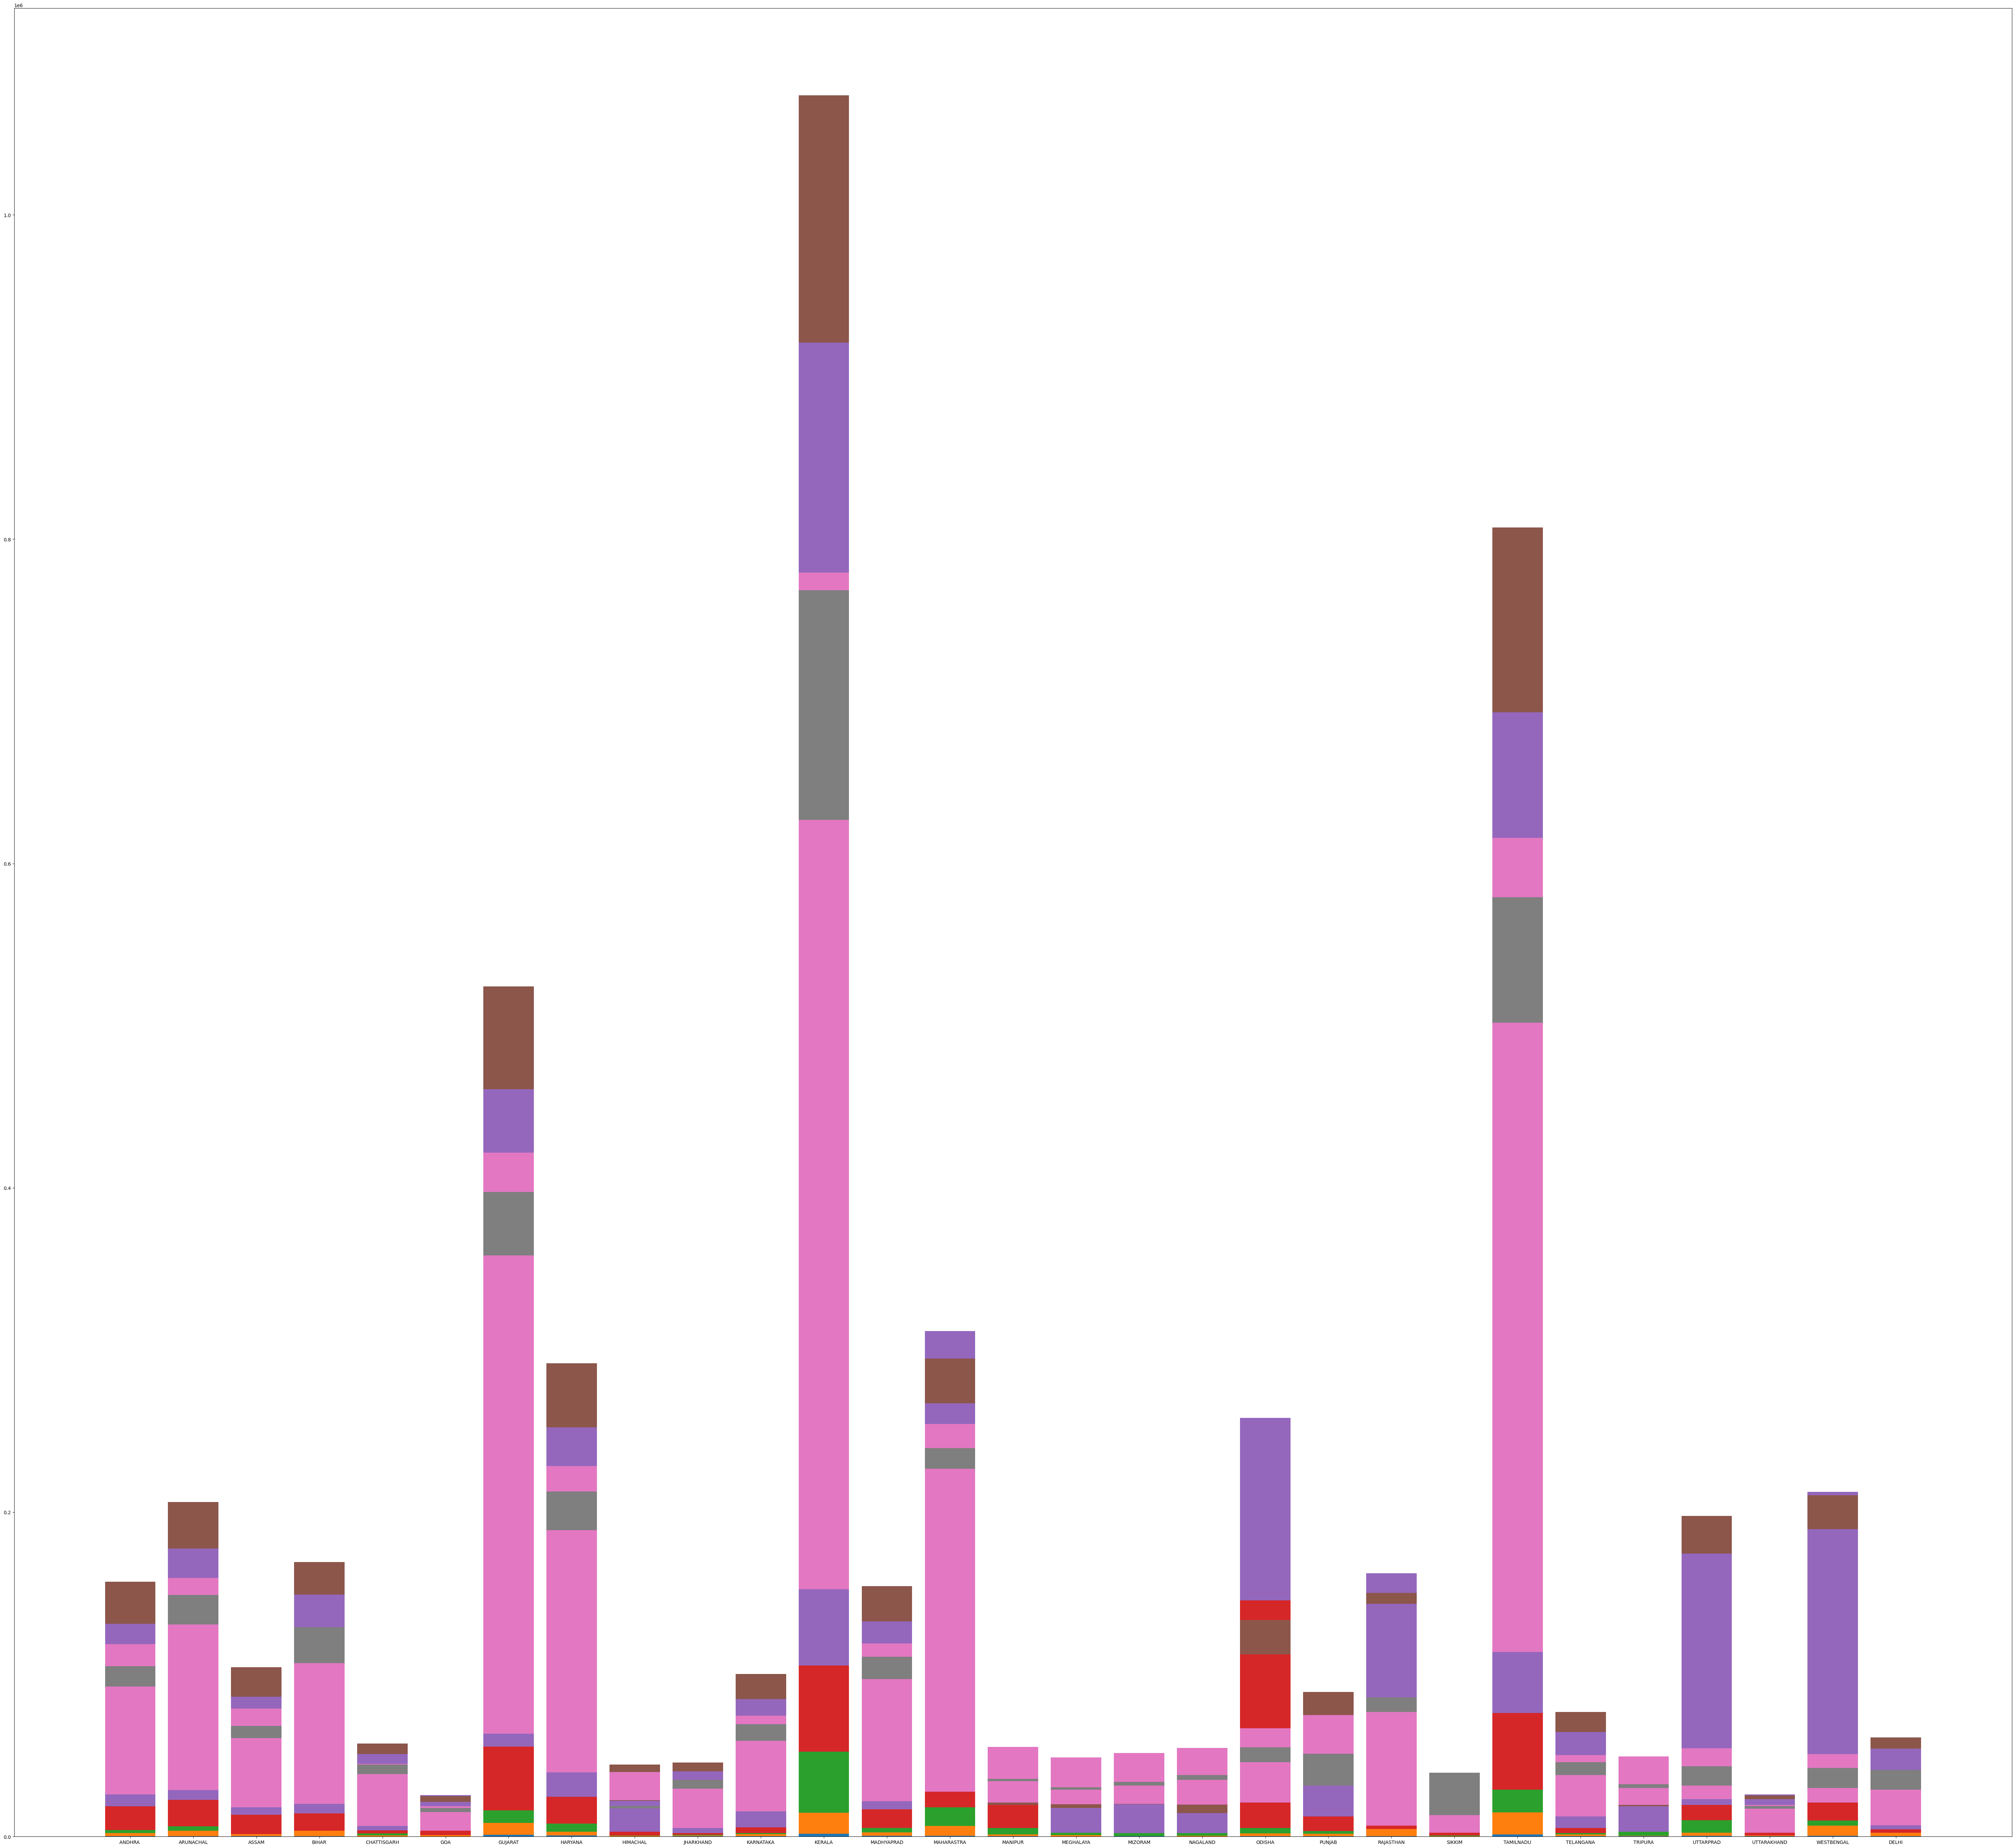

In [112]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [76, 70]
x=data['STATE']
y=data['Murder']#orange
y1=data['Rape']#green
y2=data['Robbery']#red
y3=data['Assault']#violet
y4=data['Property Crime']#pink
y5=data['Burglary']#green
y6=data['Larceny theft']#violet
y7=data['Vehicle theft']#brown
plt.bar(x,y)
plt.bar(x,y1,bottom=y)
plt.bar(x,y2,bottom=y1)
plt.bar(x,y3,bottom=y2)
plt.bar(x,y4,bottom=y3)
plt.bar(x,y5,bottom=y4)
plt.bar(x,y6,bottom=y5)
plt.bar(x,y7,bottom=y6)


It's clear that kerala and tamilnadu has more crimes being reported

Lets see a pie chart on crimes being committed in kerala

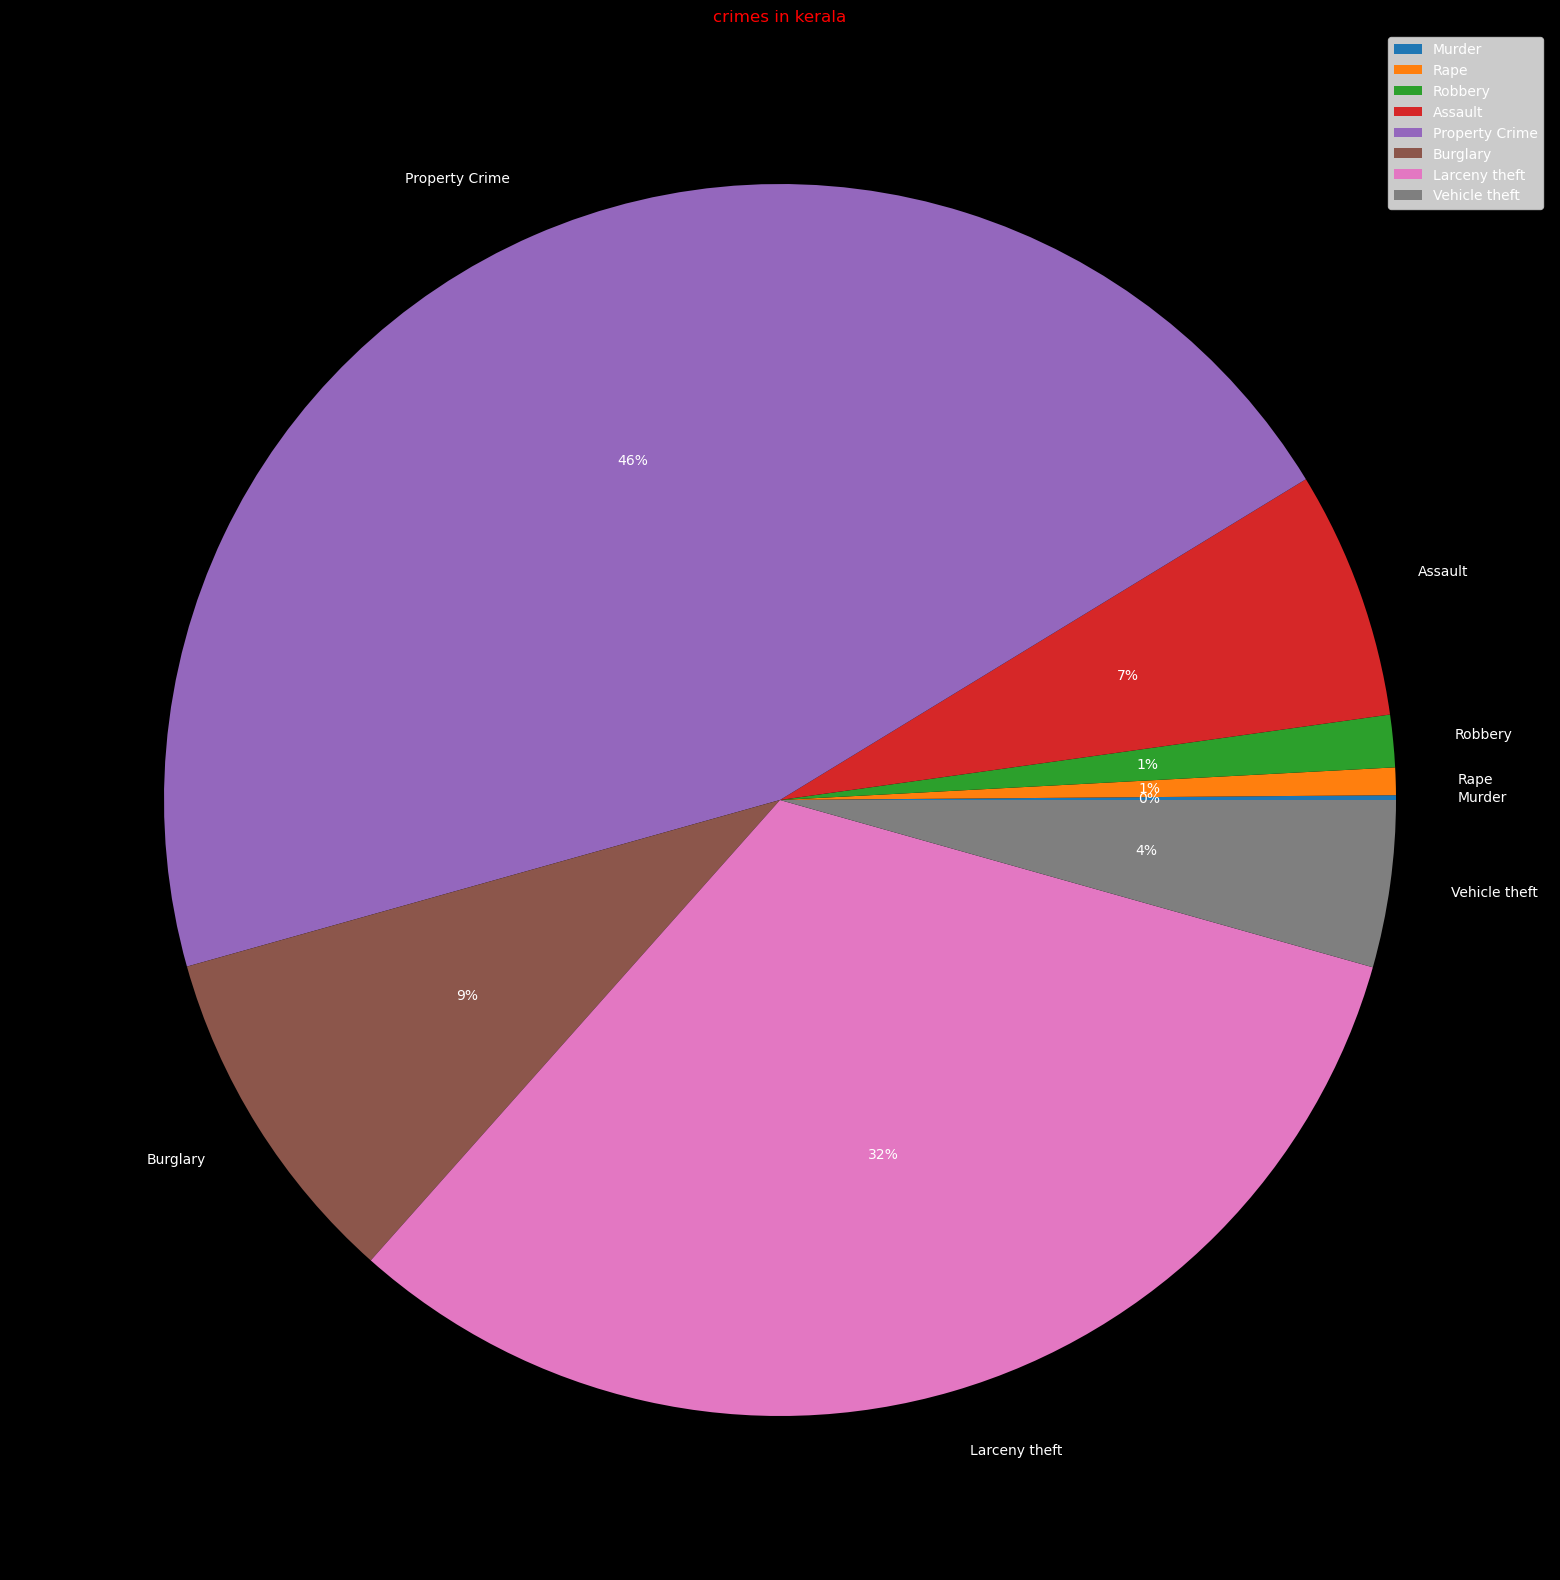

In [113]:
plt.rcParams["figure.figsize"]=[20,20]
fig=plt.figure()
fig.patch.set_facecolor('black')
mylabels=['Murder','Rape','Robbery','Assault','Property Crime','Burglary','Larceny theft','Vehicle theft']
rate=[358,2068,3941,18679.0,131133,26079.0,92477,12577]
plt.title('crimes in kerala',color='red')
plt.pie(rate,labels=mylabels,autopct='%1.0f%%')
plt.legend()
plt.show()

LETS CREATE A DONUT CHART ON CRIMES IN KERALA

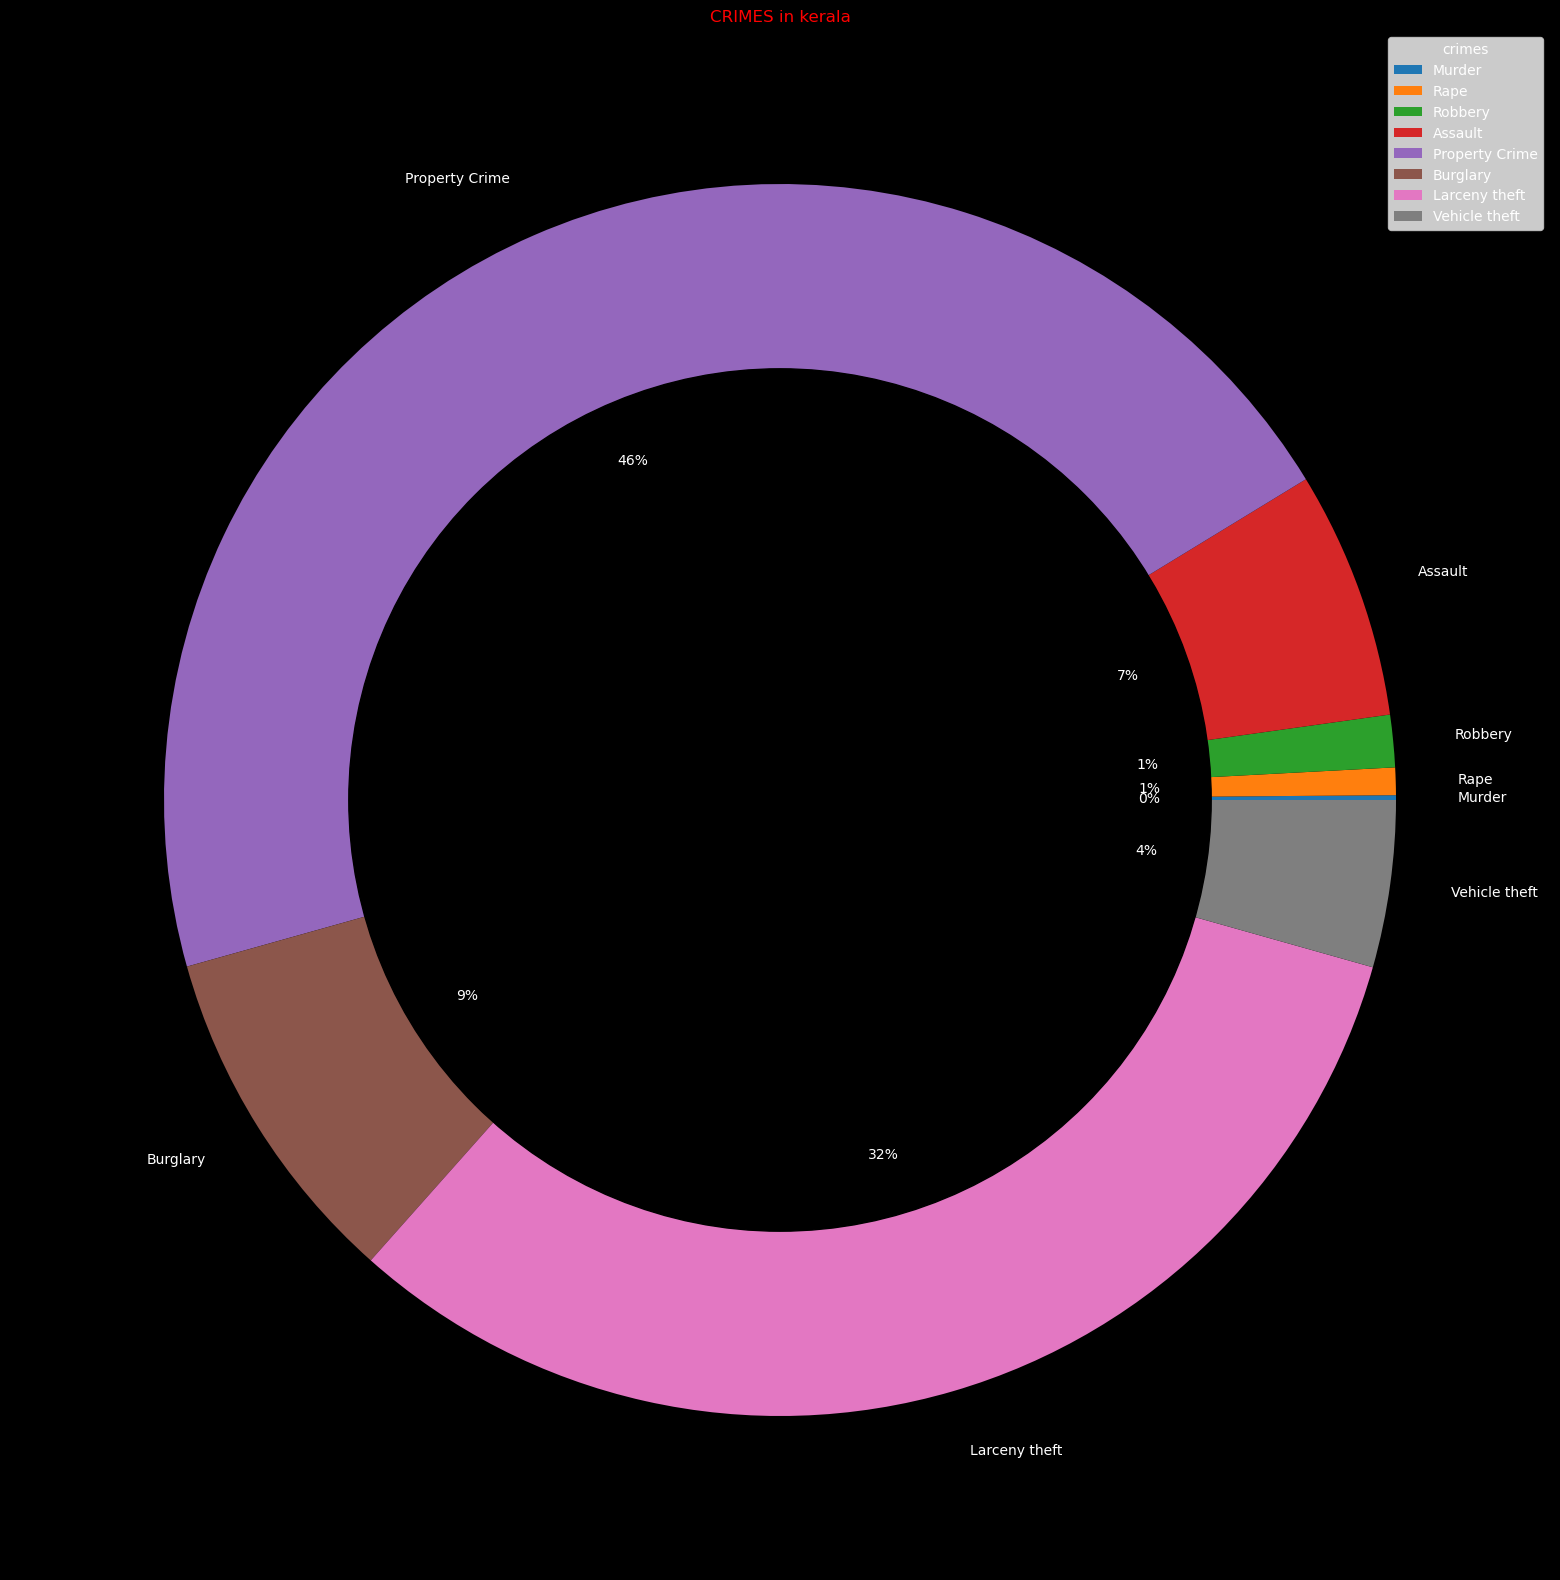

In [114]:
plt.rcParams.update({'font.size':10})
mylabels=['Murder','Rape','Robbery','Assault','Property Crime','Burglary','Larceny theft','Vehicle theft']
rate=[358,2068,3941,18679.0,131133,26079.0,92477,12577]
#creating a figure and setting different background
fig=plt.figure()
fig.patch.set_facecolor('black')
#changing color of text
plt.rcParams['text.color']='white'
#creating a circle at the center of the plot
cir=plt.Circle((0,0),0.7,color='black')
plt.pie(rate,labels=mylabels,autopct='%1.0f%%')
f=plt.gcf()
f.gca().add_artist(cir)
plt.legend(title='crimes')
plt.title('CRIMES in kerala',color='red')
plt.show()

IMPLEMENTING THE ALGORITHMS

In [115]:
#standardize the data to normal distribution

In [116]:
data.drop(['STATE'],axis=1,inplace=True)

In [117]:
data.head()
data.isnull().sum()

Murder            0
Rape              0
Robbery           0
Assault           0
Property Crime    0
Burglary          0
Larceny theft     0
Vehicle theft     0
dtype: int64

STANDARDIZATION - very helpful for ml algorithms as it scales value down to a common scale 

In [118]:
from sklearn import preprocessing
ndata=preprocessing.scale(data)
ndata

array([[-1.21847620e-01, -3.43485609e-01, -3.38187087e-01,
        -1.46334828e-01, -1.00935348e-01, -5.21018464e-02,
        -8.04291858e-02, -1.86464030e-01],
       [-1.03249825e-01,  7.95770794e-02, -1.00698894e-01,
        -2.42239348e-02,  1.25158578e-01,  3.02166874e-02,
         1.81467471e-01,  1.42268726e-02],
       [-4.30039645e-01, -2.73682919e-01, -5.67499298e-01,
        -3.03061505e-01, -3.19143578e-01, -3.02953439e-01,
        -2.97419702e-01, -3.72140920e-01],
       [-9.79361698e-02,  1.35313067e-01, -3.64927353e-01,
        -2.82674295e-01, -1.31522727e-02, -2.41088862e-01,
         1.89330836e-02,  1.56877995e-01],
       [-7.96681883e-01, -6.87721686e-01, -5.31717359e-01,
        -5.99495178e-01, -4.91189849e-01, -6.69113818e-01,
        -4.49713657e-01, -4.24563947e-01],
       [-8.89670856e-01, -6.03586885e-01, -6.37812733e-01,
        -5.80746226e-01, -6.34940956e-01, -7.59538528e-01,
        -6.09288026e-01, -5.45072102e-01],
       [ 1.90796882e+00,  1.351950

IMPLEMENTING 
K-MEANS CLUSTERING ALGORITHM

-k means clustering requires the number of clusters to be decided unlike heirarchial clustering.Lets figure out the number of clusters using Elbow method

In [119]:
#finding the number of clusters

In [120]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\Rohith\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


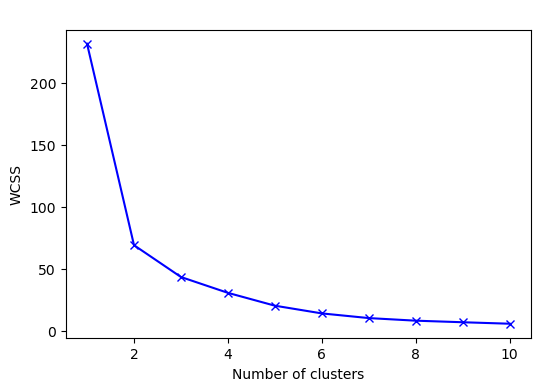

In [121]:
plt.figure(figsize=(6,4))
wcss=[]#within cluster sum of squares
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init= 'k-means++',random_state=21)
    kmean.fit(ndata)
    wcss.append(kmean.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.title('the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

as we can clearly see the plot bend is at 3, which signifies the data will be distributed between 4 clusters
 
K=3

In [122]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(ndata)
y_kmeans

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 0])

In [123]:
#we will begin the cluster with 1 rather than 0

In [124]:
Y=y_kmeans+1

In [125]:
Y

array([1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       2, 1, 1, 1, 1, 3, 1])

In [126]:
#we will add a new list called cluster
cluster=list(Y)
cluster

[1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1]

In [127]:
data['cluster']=cluster
data

,Murder,Rape,Robbery,Assault,Property Crime,Burglary,Larceny theft,Vehicle theft,cluster
0,358,2068,3941,18679.0,131133,26079.0,92477,12577,1
1,365,3662,6410,22704.0,177638,28699.0,130788,18151,1
2,242,2331,1557,13513.0,86250,18095.0,60735,7420,1
3,367,3872,3663,14185.0,149189,20064.0,107012,22113,1
4,104,771,1929,3742.0,50862,6441.0,38457,5964,1
5,69,1088,826,4360.0,21294,3563.0,15114,2617,1
6,1122,8456,16217,55475.0,460846,63396.0,358402,39048,3
7,654,2922,7961,24633.0,252249,39506.0,188967,23776,3
8,145,546,790,2967.0,21931,22423.0,17359,1604,1
9,210,765,1131,2098.0,40228,5340.0,29634,5254,1


In [128]:
kmeans_mean_cluster=pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Rape,Robbery,Assault,Property Crime,Burglary,Larceny theft,Vehicle theft
cluster,,,,,,,,
1,243.1,1878.1,3531.6,9383.4,68565.4,16610.3,47478.1,9020.2
2,1549.5,14811.5,40644.5,90897.0,807159.0,133228.5,564307.5,109623.0
3,652.8,5312.2,11453.2,58668.4,256435.4,34499.6,169979.2,19446.0


PLOTTING CLUSTERS


Text(0.5, 0, 'clusters')

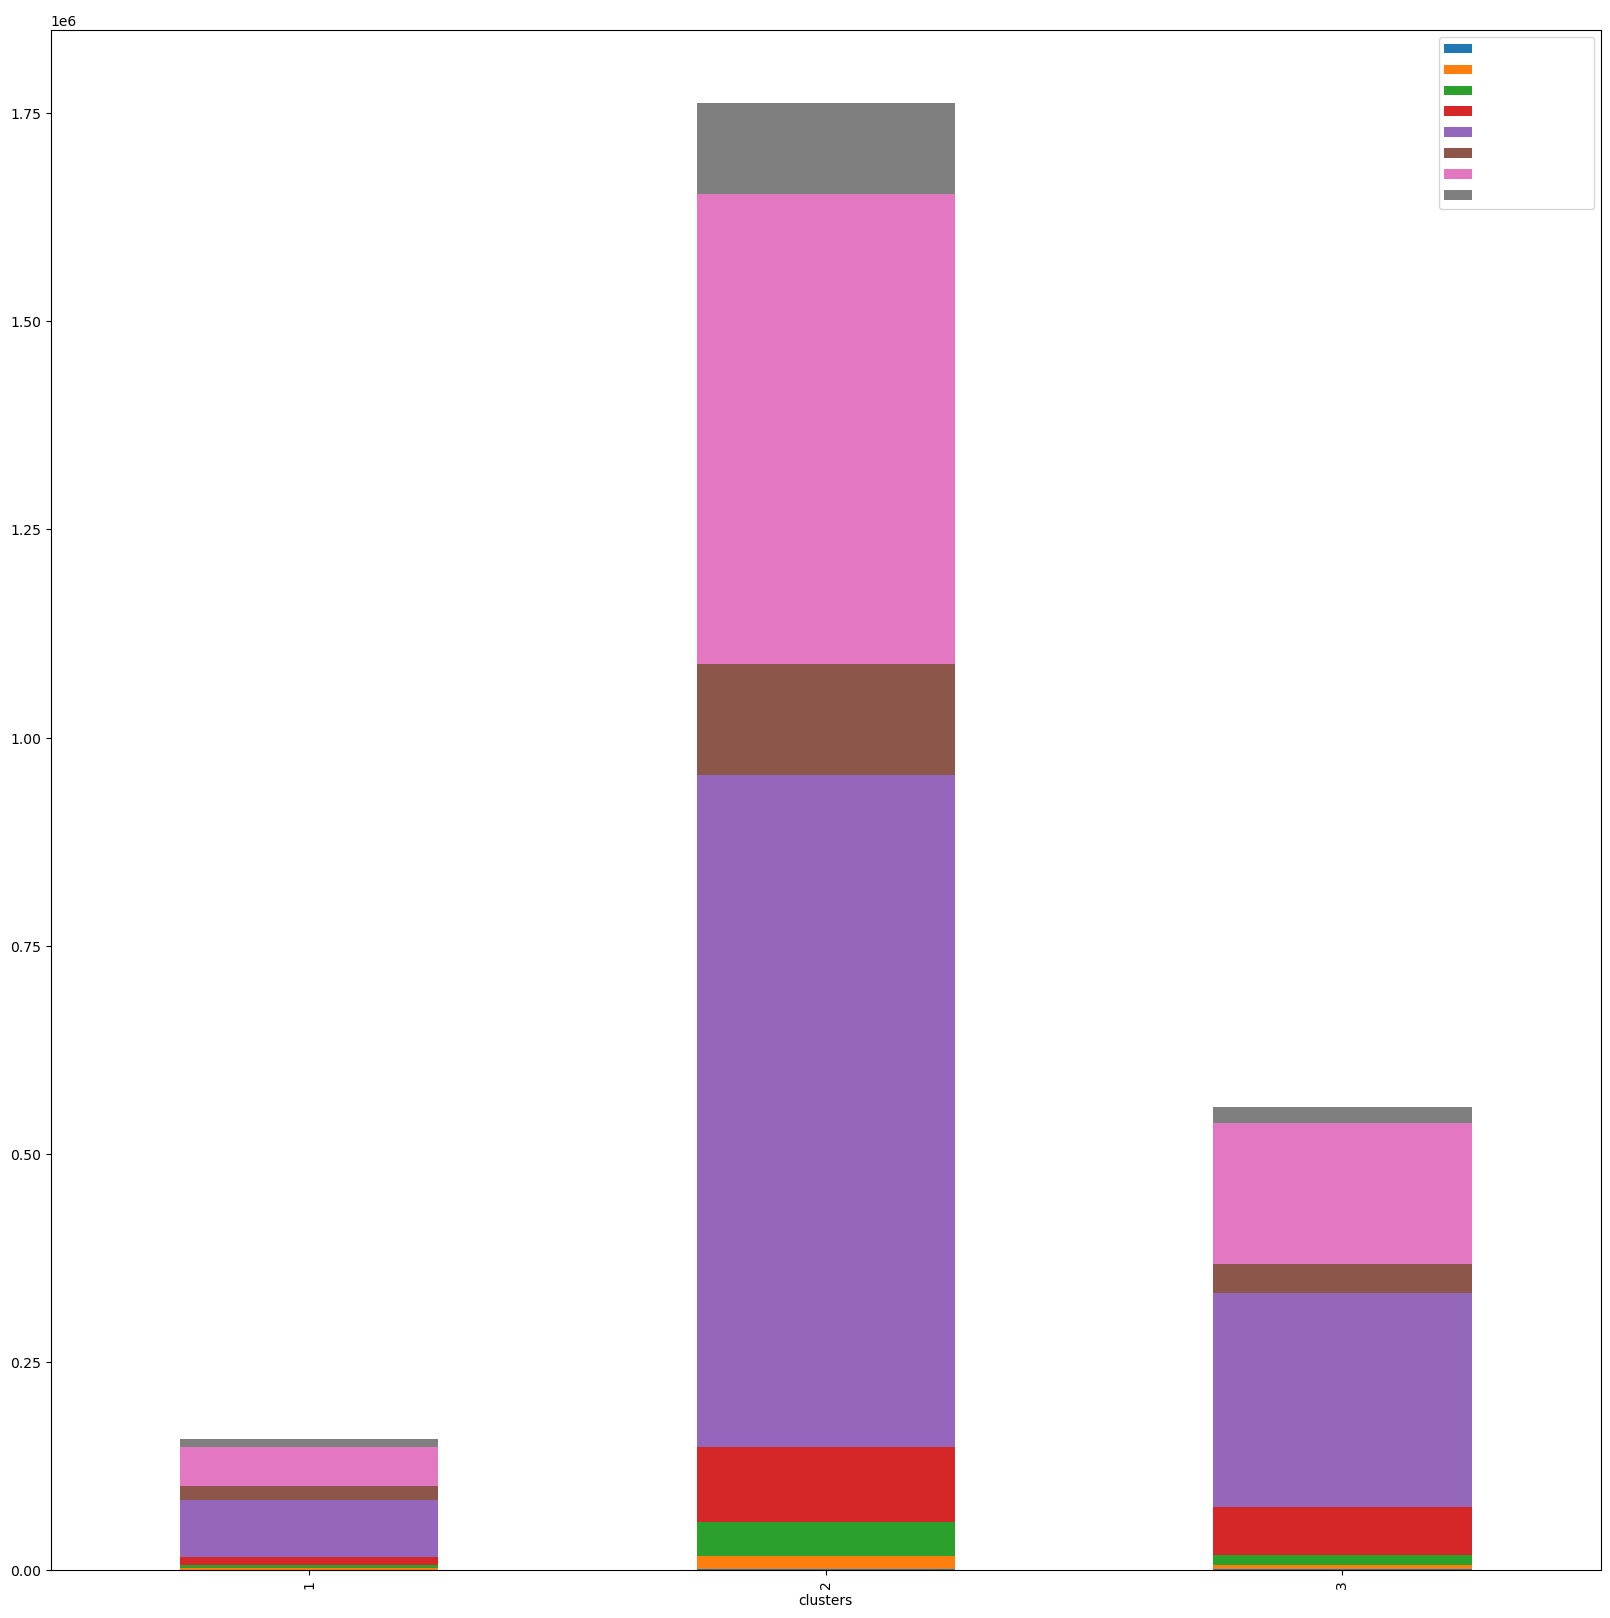

In [129]:
kmeans_mean_cluster.plot(kind='bar',stacked=True)
plt.rcParams['figure.figsize']=(15,10)
plt.title('cluster analysis')
plt.xlabel('clusters')

In [130]:
X=ndata

In [131]:
Y

array([1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       2, 1, 1, 1, 1, 3, 1])

SCATTERPLOT TO UNDERSTAND THE CLUSTERS


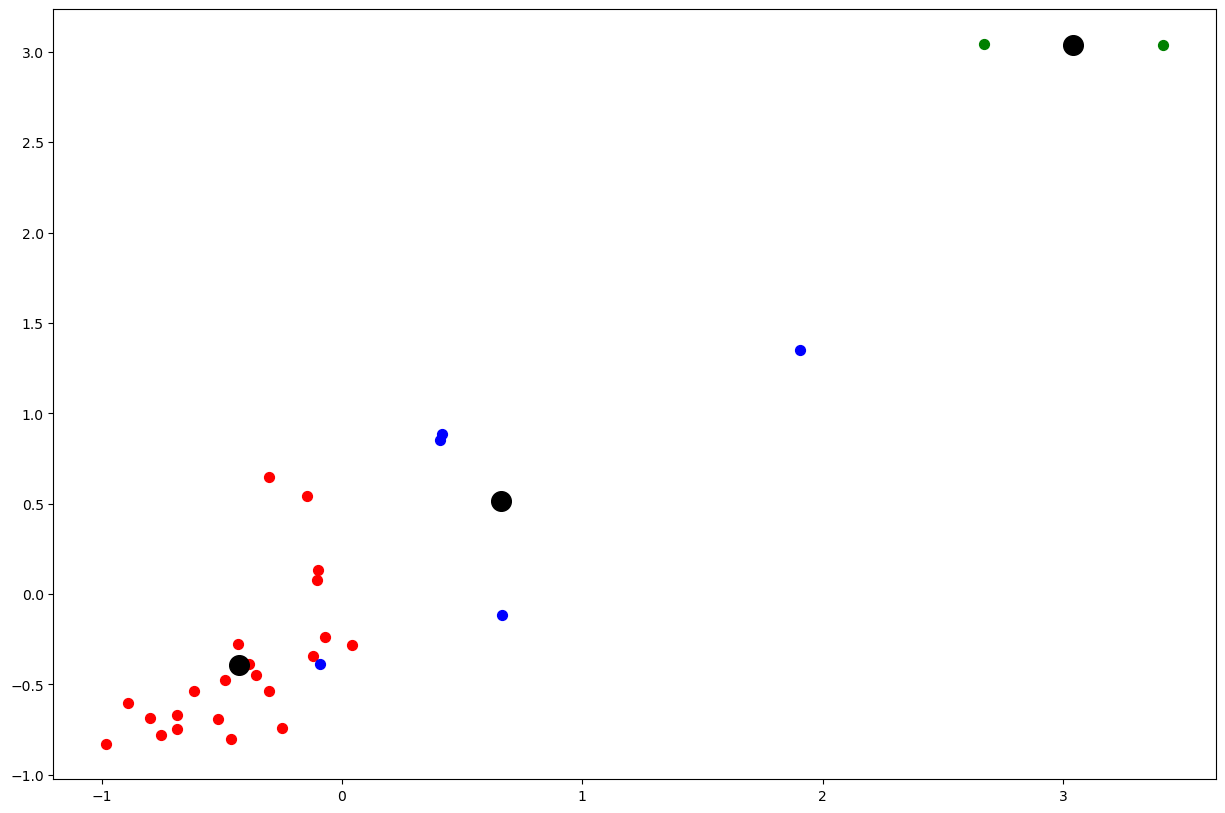

In [132]:
import seaborn as sns
from sklearn.cluster import KMeans
kmans=KMeans(n_clusters=3,init='k-means++',random_state=0)
Y=kmans.fit_predict(X)
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroids')
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')
plt.show()

SO THERE ARE 3 CLUSTERS OF STATES

-cluster 2 consists of 2 states with high crime rate

-cluster 3 consists of 6 states with medium crime rate

-cluster 1 consists of 22 states with considerable crime rate

REGARDING OUTLIERS:-

It's clear we can see an outlier data in the first cluster, this is mainly because of few exceptions where one kind of crime precedes other forms of crime in a state. it is just an anomaly.